In [3]:
import pandas as pd
import numpy as np
import re
import random

In [4]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from os import listdir, walk
from os.path import isfile, join
from pandas.plotting import parallel_coordinates
from tabulate import tabulate, SEPARATING_LINE



# Generate tables and plots

In [5]:
df = pd.read_csv('analysis_fixed.csv')

In [6]:
df.columns

Index(['Instance_Name', 'Number_Of_Customers', 'Number_Of_Hotels',
       'Objective_Value', 'Sum_of_Trips', 'Penalties', 'Hotel_Fees',
       'Max_Trip_Length', 'Number_Of_Trips', 'Prize', 'Time', 'Trace',
       'Neighborhood', 'Step_Function'],
      dtype='object')

In [7]:
instances = list(df['Instance_Name'].unique())

In [8]:
def generate_local_search_df(data):
    bests = []
    neighborhoods = []
    step_functions = []
    times = []
    max_trip_lengths = []
    number_of_trips = []
    prizes = []
    traces = []


    for instance in instances:
        val = data['Instance_Name'] == instance
 
        df_instance = data[val]

        v = df_instance['Objective_Value']
        t = df_instance['Time']

        best_rows_bools = df_instance['Objective_Value'] == min(v)

        best_rows = df_instance[best_rows_bools]
        n_rows, n_cols = best_rows.shape

        index = 0
        if n_rows > 1:
            index = random.randint(0,n_rows-1)

        best_row = best_rows.iloc[index,:]
        #print(n_rows)
        #print(best_row)

        bests.append(best_row['Objective_Value'])
        neighborhoods.append(best_row['Neighborhood'])
        step_functions.append(best_row['Step_Function'])
        times.append(best_row['Time']) 
        max_trip_lengths.append(best_row['Max_Trip_Length'])
        number_of_trips.append(best_row['Number_Of_Trips'])
        prizes.append(best_row['Prize'])
        traces.append(best_row['Trace'])
        
    df_2 = pd.DataFrame()
    df_2['Instance_Name'] = instances
    df_2['Best-Objective-Value'] = bests
    df_2['Neighborhood'] = neighborhoods
    df_2['Step-Function'] = step_functions
    df_2['Time'] = times
    df_2['Max_Trip_Length'] = max_trip_lengths
    df_2['Number_Of_Trips'] = number_of_trips
    df_2['Prize'] = prizes
    
    df_3 = df_2.copy()    
    df_3['Trace'] = traces
    
    return (df_2, df_3)
    

In [9]:
df_all, df_all_traces = generate_local_search_df(df)


In [10]:
only_first = df['Step_Function'] == 'Step_Function_Type.FIRST'
df_first, df_first_traces = generate_local_search_df(df[only_first])

In [11]:
only_random = df['Step_Function'] == 'Step_Function_Type.RANDOM'
df_random, df_random_traces = generate_local_search_df(df[only_random])


In [12]:
only_best = df['Step_Function'] == 'Step_Function_Type.BEST'
df_best, df_best_traces = generate_local_search_df(df[only_best])

In [13]:
df_all

,Instance_Name,Best-Objective-Value,Neighborhood,Step-Function,Time,Max_Trip_Length,Number_Of_Trips,Prize
0,test,1070,interchange_customers,Step_Function_Type.RANDOM,0.004434,600,2,2000
1,rc101_1,235,remove_customer,Step_Function_Type.BEST,0.000080,235,1,1000
2,pr8_1,102153,trip_2_opt,Step_Function_Type.BEST,0.026205,1774,2,3000
3,eil51_1,494,trip_2_opt,Step_Function_Type.BEST,0.020204,315,1,598
4,berlin51_1,909351,move_hotel,Step_Function_Type.BEST,0.008039,1146,10,5100
5,berlin52_2,8094,remove_customer,Step_Function_Type.BEST,0.001375,1318,6,1334
6,berlin52_3,6455,move_hotel,Step_Function_Type.RANDOM,0.367453,1148,5,897
7,rc101_2,701822,trip_2_opt,Step_Function_Type.BEST,0.032368,234,8,10000
8,rc101_3,1109,add_customer,Step_Function_Type.BEST,0.175132,240,3,2728
9,pr8_2,307254,trip_2_opt,Step_Function_Type.BEST,0.478142,1996,4,14400


In [14]:
df_first

,Instance_Name,Best-Objective-Value,Neighborhood,Step-Function,Time,Max_Trip_Length,Number_Of_Trips,Prize
0,test,1070,add_hotel,Step_Function_Type.FIRST,0.000149,600,2,2000
1,rc101_1,235,remove_hotel,Step_Function_Type.FIRST,0.000006,235,1,1000
2,pr8_1,102192,insert_customer,Step_Function_Type.FIRST,0.027221,1813,2,3000
3,eil51_1,494,interchange_customers,Step_Function_Type.FIRST,0.033671,315,1,598
4,berlin51_1,909351,move_hotel,Step_Function_Type.FIRST,0.003529,1146,10,5100
5,berlin52_2,8196,trip_2_opt,Step_Function_Type.FIRST,0.008716,1313,6,1416
6,berlin52_3,6455,move_hotel,Step_Function_Type.FIRST,0.001444,1148,5,897
7,rc101_2,701824,trip_2_opt,Step_Function_Type.FIRST,0.024597,234,8,10000
8,rc101_3,1394,swap_served_unserved_customer,Step_Function_Type.FIRST,0.159932,227,3,2386
9,pr8_2,307413,trip_2_opt,Step_Function_Type.FIRST,0.320138,1996,4,14400


In [15]:
df_best

,Instance_Name,Best-Objective-Value,Neighborhood,Step-Function,Time,Max_Trip_Length,Number_Of_Trips,Prize
0,test,1070,interchange_customers,Step_Function_Type.BEST,0.000034,600,2,2000
1,rc101_1,235,trip_2_opt,Step_Function_Type.BEST,0.000324,235,1,1000
2,pr8_1,102153,trip_2_opt,Step_Function_Type.BEST,0.026205,1774,2,3000
3,eil51_1,494,trip_2_opt,Step_Function_Type.BEST,0.020204,315,1,598
4,berlin51_1,909351,move_hotel,Step_Function_Type.BEST,0.008039,1146,10,5100
5,berlin52_2,8094,remove_customer,Step_Function_Type.BEST,0.001375,1318,6,1334
6,berlin52_3,6455,move_hotel,Step_Function_Type.BEST,0.003042,1148,5,897
7,rc101_2,701822,trip_2_opt,Step_Function_Type.BEST,0.032368,234,8,10000
8,rc101_3,1109,add_customer,Step_Function_Type.BEST,0.175132,240,3,2728
9,pr8_2,307254,trip_2_opt,Step_Function_Type.BEST,0.478142,1996,4,14400


In [16]:
df_random

,Instance_Name,Best-Objective-Value,Neighborhood,Step-Function,Time,Max_Trip_Length,Number_Of_Trips,Prize
0,test,1070,interchange_customers,Step_Function_Type.RANDOM,0.004434,600,2,2000
1,rc101_1,235,remove_customer,Step_Function_Type.RANDOM,0.046986,235,1,1000
2,pr8_1,102197,trip_2_opt,Step_Function_Type.RANDOM,1.023597,1818,2,3000
3,eil51_1,495,trip_2_opt,Step_Function_Type.RANDOM,1.941037,316,1,598
4,berlin51_1,909351,move_hotel,Step_Function_Type.RANDOM,0.569480,1146,10,5100
5,berlin52_2,8235,insert_customer,Step_Function_Type.RANDOM,2.153579,1313,6,1416
6,berlin52_3,6455,move_hotel,Step_Function_Type.RANDOM,0.367453,1148,5,897
7,rc101_2,701828,trip_2_opt,Step_Function_Type.RANDOM,1.619163,234,8,10000
8,rc101_3,1484,swap_served_unserved_customer,Step_Function_Type.RANDOM,6.681978,227,3,2288
9,pr8_2,307682,trip_2_opt,Step_Function_Type.RANDOM,7.268485,1996,4,14400


In [17]:
print(tabulate(df_all, headers=df_all.columns, tablefmt='latex'))

\begin{tabular}{rlrllrrrr}
\hline
    & Instance\_Name   &   Best-Objective-Value & Neighborhood          & Step-Function             &        Time &   Max\_Trip\_Length &   Number\_Of\_Trips &   Prize \\
\hline
  0 & test            &                   1070 & interchange\_customers & Step\_Function\_Type.RANDOM & 0.00443387  &               600 &                 2 &    2000 \\
  1 & rc101\_1         &                    235 & remove\_customer       & Step\_Function\_Type.BEST   & 8.01086e-05 &               235 &                 1 &    1000 \\
  2 & pr8\_1           &                 102153 & trip\_2\_opt            & Step\_Function\_Type.BEST   & 0.0262053   &              1774 &                 2 &    3000 \\
  3 & eil51\_1         &                    494 & trip\_2\_opt            & Step\_Function\_Type.BEST   & 0.0202038   &               315 &                 1 &     598 \\
  4 & berlin51\_1      &                 909351 & move\_hotel            & Step\_Function\_Type.BEST   & 0.

In [18]:
print(tabulate(df_first, headers=df_first.columns, tablefmt='latex'))

\begin{tabular}{rlrllrrrr}
\hline
    & Instance\_Name   &   Best-Objective-Value & Neighborhood                  & Step-Function            &        Time &   Max\_Trip\_Length &   Number\_Of\_Trips &   Prize \\
\hline
  0 & test            &                   1070 & add\_hotel                     & Step\_Function\_Type.FIRST & 0.000149488 &               600 &                 2 &    2000 \\
  1 & rc101\_1         &                    235 & remove\_hotel                  & Step\_Function\_Type.FIRST & 6.19888e-06 &               235 &                 1 &    1000 \\
  2 & pr8\_1           &                 102192 & insert\_customer               & Step\_Function\_Type.FIRST & 0.0272214   &              1813 &                 2 &    3000 \\
  3 & eil51\_1         &                    494 & interchange\_customers         & Step\_Function\_Type.FIRST & 0.0336714   &               315 &                 1 &     598 \\
  4 & berlin51\_1      &                 909351 & move\_hotel             

In [19]:
print(tabulate(df_best, headers=df_best.columns, tablefmt='latex'))

\begin{tabular}{rlrllrrrr}
\hline
    & Instance\_Name   &   Best-Objective-Value & Neighborhood          & Step-Function           &        Time &   Max\_Trip\_Length &   Number\_Of\_Trips &   Prize \\
\hline
  0 & test            &                   1070 & interchange\_customers & Step\_Function\_Type.BEST & 3.40939e-05 &               600 &                 2 &    2000 \\
  1 & rc101\_1         &                    235 & trip\_2\_opt            & Step\_Function\_Type.BEST & 0.000323772 &               235 &                 1 &    1000 \\
  2 & pr8\_1           &                 102153 & trip\_2\_opt            & Step\_Function\_Type.BEST & 0.0262053   &              1774 &                 2 &    3000 \\
  3 & eil51\_1         &                    494 & trip\_2\_opt            & Step\_Function\_Type.BEST & 0.0202038   &               315 &                 1 &     598 \\
  4 & berlin51\_1      &                 909351 & move\_hotel            & Step\_Function\_Type.BEST & 0.00803924  &

In [20]:
print(tabulate(df_random, headers=df_random.columns, tablefmt='latex'))

\begin{tabular}{rlrllrrrr}
\hline
    & Instance\_Name   &   Best-Objective-Value & Neighborhood                  & Step-Function             &        Time &   Max\_Trip\_Length &   Number\_Of\_Trips &   Prize \\
\hline
  0 & test            &                   1070 & interchange\_customers         & Step\_Function\_Type.RANDOM &  0.00443387 &               600 &                 2 &    2000 \\
  1 & rc101\_1         &                    235 & remove\_customer               & Step\_Function\_Type.RANDOM &  0.0469859  &               235 &                 1 &    1000 \\
  2 & pr8\_1           &                 102197 & trip\_2\_opt                    & Step\_Function\_Type.RANDOM &  1.0236     &              1818 &                 2 &    3000 \\
  3 & eil51\_1         &                    495 & trip\_2\_opt                    & Step\_Function\_Type.RANDOM &  1.94104    &               316 &                 1 &     598 \\
  4 & berlin51\_1      &                 909351 & move\_hotel      

In [21]:
# 12 is a280
points = df_best_traces['Trace'][12].split(";")
int_points = []

int_points.append(int(points[0][1:]))
for i in range(1,len(points) - 1):
    int_points.append(int(points[i]))
int_points.append(int(points[len(points) - 1][:-1]))

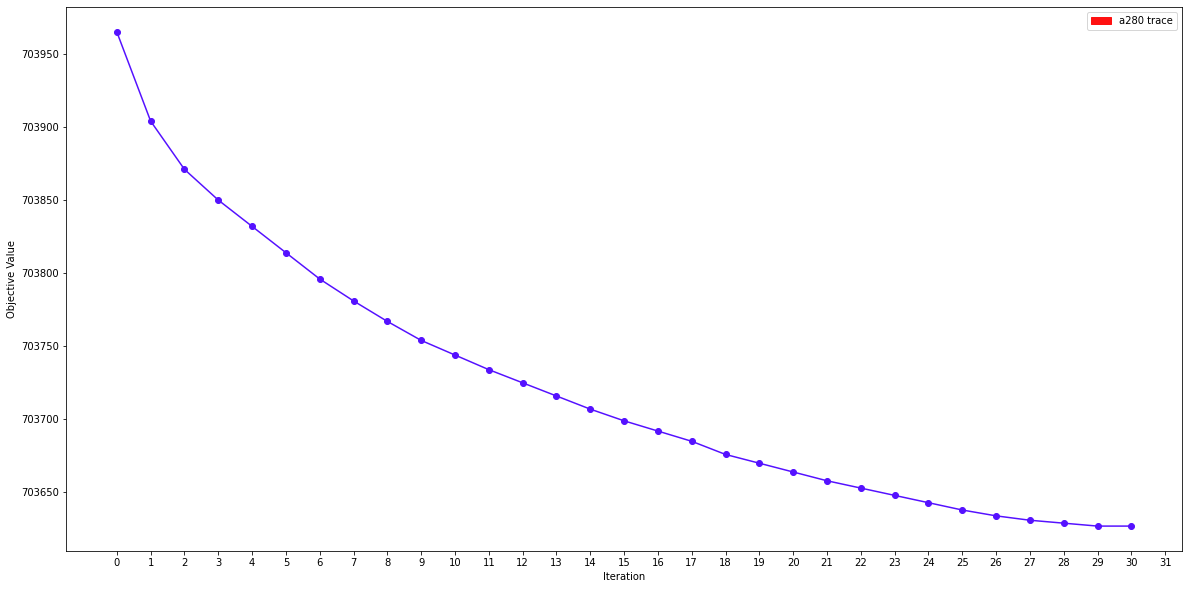

In [22]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(list(range(len(int_points))), int_points, '-o', color='#5511ff')

ax.set_xlabel("Iteration")
ax.set_ylabel("Objective Value")
patches = [mpatches.Patch(color='#ff1111', label='a280 trace')]
           

ax.legend(handles=patches, loc='upper right')
plt.xticks(list(range(len(int_points) + 1)))
plt.savefig('local_search_a280_trace.png', dpi=300)
plt.show()